In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
del df['Unnamed: 0']

In [8]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


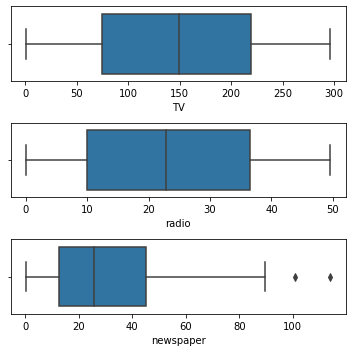

In [9]:
#checking for outliers 
fig,axs=plt.subplots(3,figsize=(5,5))
sns.boxplot(df['TV'],ax=axs[0])
sns.boxplot(df['radio'],ax=axs[1])
sns.boxplot(df['newspaper'],ax=axs[2])
plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


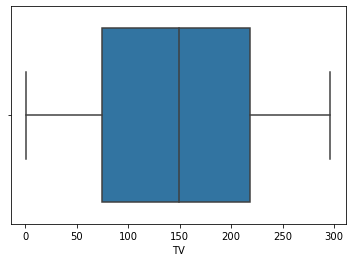

In [10]:
sns.boxplot(df['TV'])
plt.show()

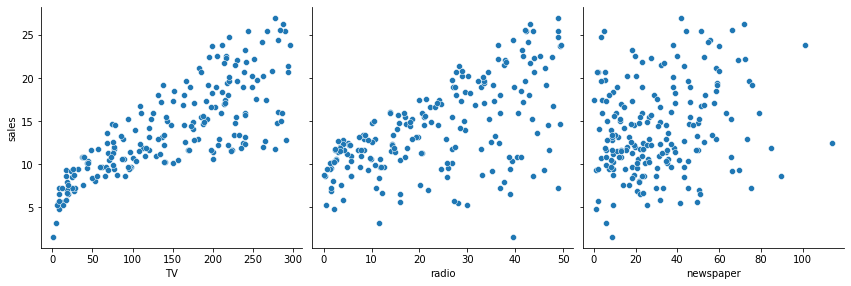

In [11]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=4,aspect=1,kind='scatter')
plt.show()

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


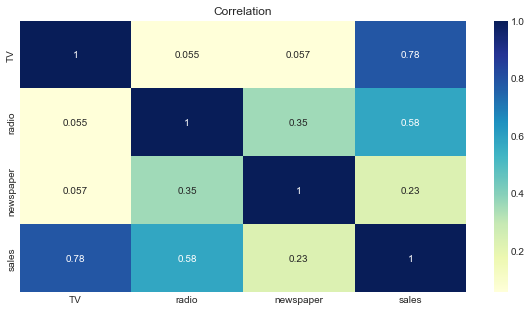

In [13]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation")
plt.show()

In [14]:
x=np.array(df.drop(["sales"],1))
y=np.array(df["sales"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\HP\AppData\Local\Temp/ipykernel_17848/414635689.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=np.array(df.drop(["sales"],1))


In [15]:
data=pd.DataFrame(data={"Predicted Sales":y_pred.flatten()})

In [16]:
data

,Predicted Sales
0,16.408024
1,20.889882
2,21.553843
3,10.608503
4,22.112373
5,13.105592
6,21.057192
7,7.461010
8,13.606346
9,15.155070


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.7815996615334502

In [19]:
r_squared=r2_score(y_test,y_pred)*100
r_squared

89.9438024100912

The model is good one.It's working well.